In [4]:
import numpy as np
import pandas as pd
import statsmodels
import statsmodels.api as sm
from statsmodels.tsa.stattools import coint
np.random.seed(107)
import matplotlib.pyplot as plt

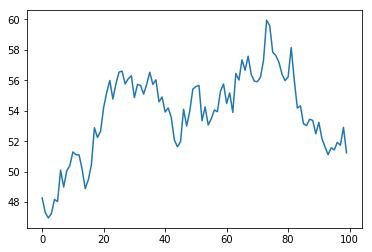

In [8]:
# generate daily returns
X_returns = np.random.normal(0, 1, 100)
# sum and shift all prices up into range
X = pd.Series(np.cumsum(X_returns), name='X') + 50
X.plot();


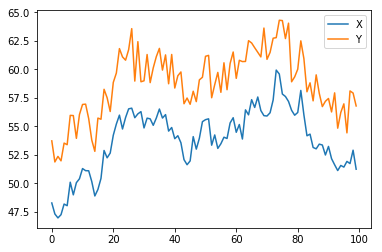

In [10]:
noise = np.random.normal(0, 1, 100)
Y = X + 5 + noise
Y.name = 'Y'
pd.concat([X, Y], axis=1).plot();

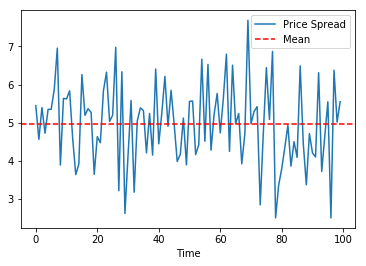

In [12]:
(Y - X).plot()
plt.axhline((Y - X).mean(), color='red', linestyle='--')
plt.xlabel('Time')
plt.legend(['Price Spread', 'Mean']);

In [13]:
score, pvalue, _ = coint(X, Y)
print(pvalue)

0.17557821500666887


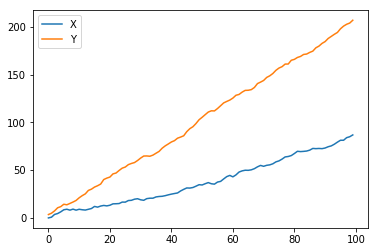

In [14]:
X_returns = np.random.normal(1, 1, 100)
Y_returns = np.random.normal(2, 1, 100)

X_diverging = pd.Series(np.cumsum(X_returns), name='X')
Y_diverging = pd.Series(np.cumsum(Y_returns), name='Y')

pd.concat([X_diverging, Y_diverging], axis=1).plot();

In [15]:
print('Correlation: ' + str(X_diverging.corr(Y_diverging)))
score, pvalue, _ = coint(X_diverging, Y_diverging)
print('Cointegration test p-value: ' + str(pvalue))

Correlation: 0.9909807249660008
Cointegration test p-value: 0.837270755322713


In [21]:
Y2 = pd.Series(np.random.normal(0, 1, 1000), name='Y2') + 20
Y3 = Y2.copy()

In [22]:
Y3[0:100] = 30
Y3[100:200] = 10
Y3[200:300] = 30
Y3[300:400] = 10
Y3[400:500] = 30
Y3[500:600] = 10
Y3[600:700] = 30
Y3[700:800] = 10
Y3[800:900] = 30
Y3[900:1000] = 10

(0, 40)

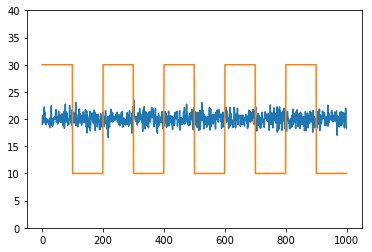

In [23]:
Y2.plot()
Y3.plot()
plt.ylim([0, 40])

In [25]:
print('Correlation: ' + str(Y2.corr(Y3)))
score, pvalue, _ = coint(Y2,Y3)
print('Cointegration test p-value: ' + str(pvalue))

Correlation: -0.04900884448295425
Cointegration test p-value: 4.7121443955772576e-27


In [26]:
def find_cointegrated_pairs(data):
    n = data.shape[1]
    score_matrix = np.zeros((n, n))
    pvalue_matix = np.ones((n, n))
    keys = data.keys()
    pairs = []
    for i in range(n):
        for j in range(i+1, n):
            S1 = data[keys[i]]
            S2 = data[keys[j]]
            result = coin(S1, S2)
            score = result[0]
            pvalue = result[1]
            score_matrix[i, j] = score
            pvalue_matrix[i, j] = pvalue
            if pvalue < 0.05:
                pairs.append((keys[i], keys[j]))
    return score_matrix, pvalue_matix, pairs

In [27]:
symbol_list = ['AGBG', 'ASTI', 'CSUN', 'DQ', 'FSLR', 'SPY']
prices_df = get_pricing(symbol_list, fields=['price'], start_date='2014-01-01', end_date='2015-01-01')['price']
prices_df.columns = map(lambda x: x.symbol, prices_df.columns)

NameError: name 'get_pricing' is not defined